In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [137]:
housing = pd.read_csv("dataset/housing.csv")

# Structure of the data:

In [138]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [139]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Only **ocean_proximity** is a categorical variable (type: object). Later, we can use LabelEncoder to transform it into numeric values.

In [140]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

As we see, groups are not equal. We can connect the ones with similar categories (for example: near ocean, near bay, island can be connected to a group called 'near water') or/and use OneHotEncoder, so it can be easier to ML algorithms to process as binary values.

In [141]:
housing.describe(exclude=[np.number])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


Checking if there are any null values:

In [142]:
def get_null_count(housing):
    for i in housing.columns:
        print(i,': ',len(housing[housing[i].isnull()][i]))

get_null_count(housing)

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  207
population :  0
households :  0
median_income :  0
median_house_value :  0
ocean_proximity :  0


In [143]:
pd.set_option('display.max_rows', None)
housing[housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND
504,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN
1009,-120.85,37.78,25.0,421.0,NaN,303.0,106.0,2.2679,71300.0,INLAND
1271,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,120400.0,<1H OCEAN
1343,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,59600.0,INLAND
1441,-122.39,37.59,32.0,4497.0,NaN,1846.0,715.0,6.1323,500001.0,NEAR OCEAN


These null values will be later dealt with, using Imputer that will replace all nulls of every attribute by its median.

# Statistics and plots

In [144]:
housing.describe().applymap(lambda x: f"{x:0.2f}")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


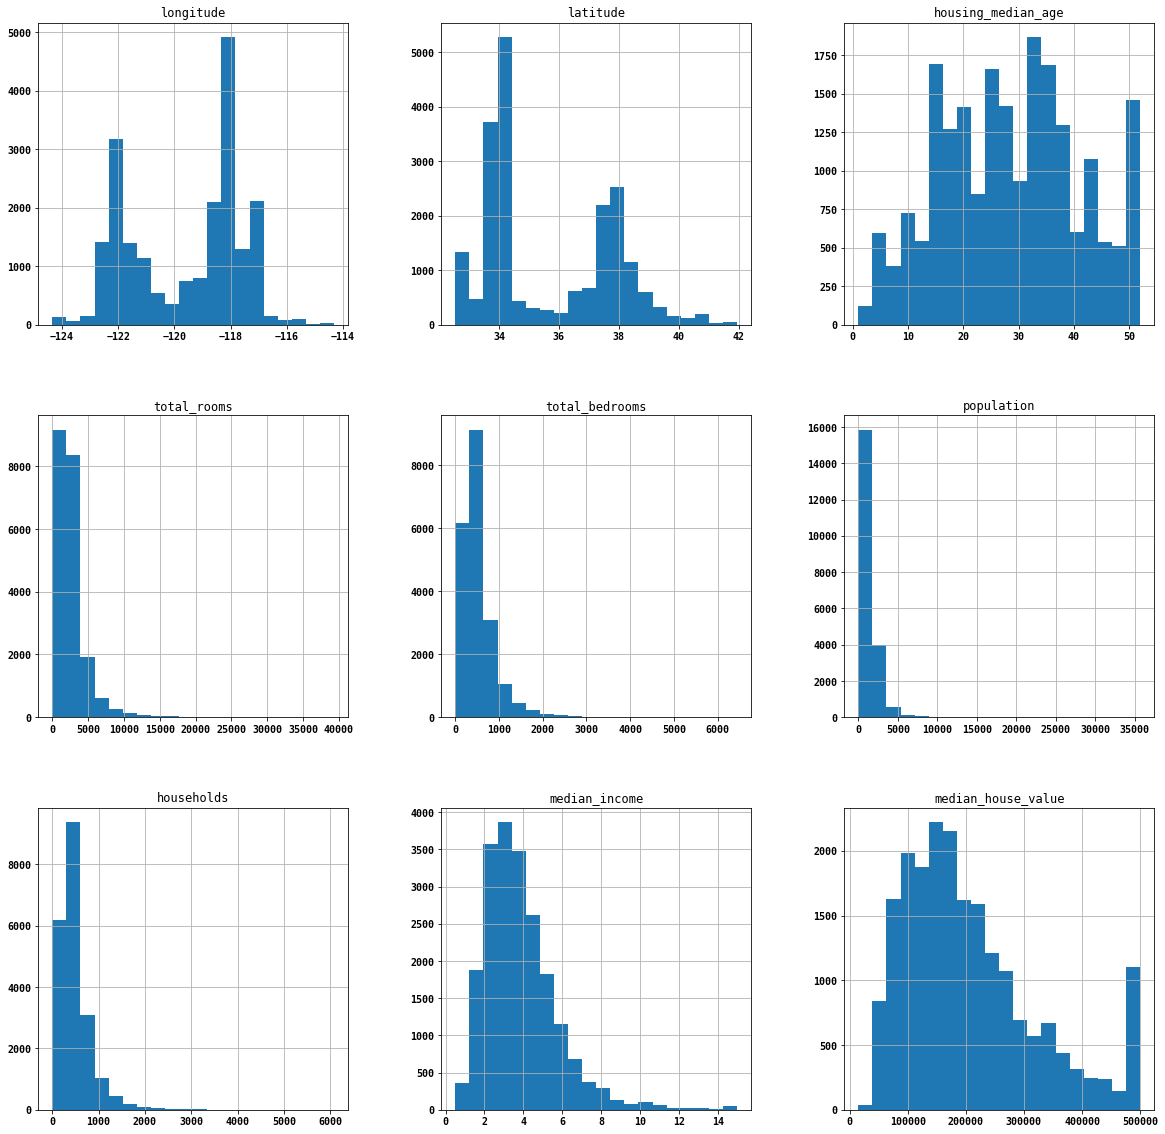

In [145]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '12'}
plt.rc('font', **font) 
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=20, figsize = (20,20))
plt.show()

Most of the features are heavy-tailed. <br>
housing_median_age and median_housing_values were restricted at the end. The second attribute is important for us, as it's our target attribute.

# Creating test Set

In [146]:
from sklearn.model_selection import train_test_split

In [148]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [21]:
#housing = train_set.drop("median_house_value", axis=1)
#housing_labels = train_set["median_house_value"].copy()

In [150]:
train_set.to_csv("dataset/train_set.csv",index=False)
test_set.to_csv("dataset/test_set.csv",index=False)

# EDA

In [151]:
housing = pd.read_csv("dataset/train_set.csv")

In [152]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [20]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_population = scaler.fit_transform(housing1[["population"]])
#housing1["Scaled_population"] = scaled_population
#housing.plot(kind = "scatter", x = "longitude", y="latitude", alpha = 0.05)

In [28]:
# plt.figure(figsize=(10,6))
# plt.scatter(x=housing1['longitude'],y=housing1['latitude'], alpha=0.1)
# plt.title("Distribution of houses")

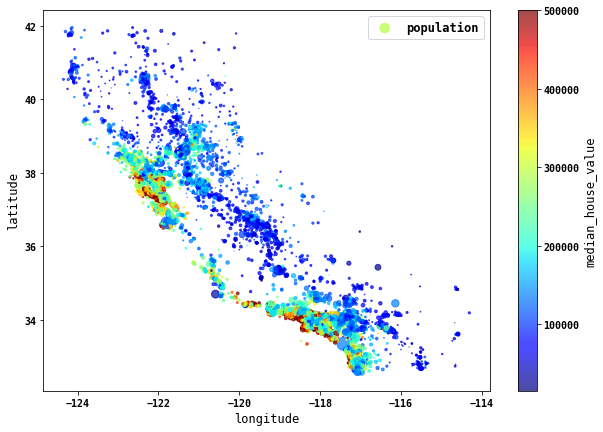

In [153]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.7,
    s=housing["population"]/200, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

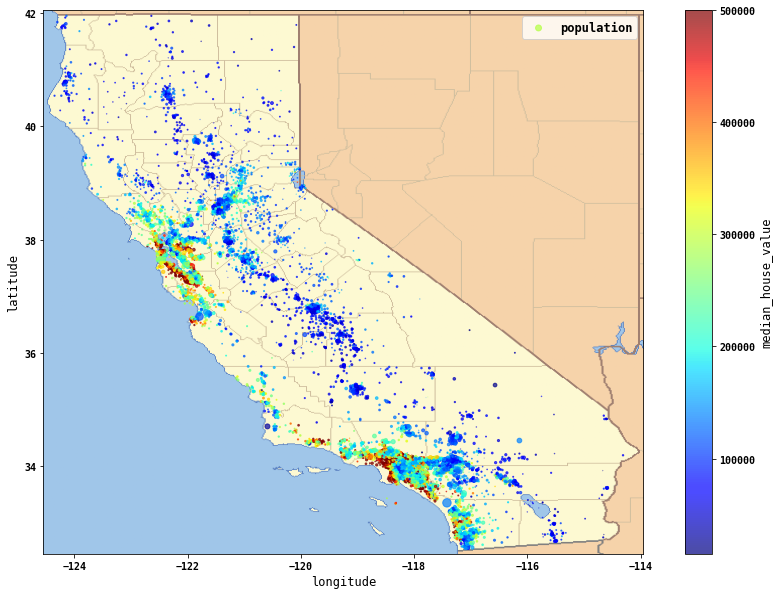

In [154]:
# IMAGES_PATH = Path() / "images" 
# IMAGES_PATH.mkdir(parents=True, exist_ok=True)
filename = "images/california.png"
california_img = plt.imread(filename)
# if not (IMAGES_PATH / filename).is_file():
#     homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
#     url = homl3_root + "images/end_to_end_project/" + filename
#     print("Downloading", filename)
#     urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing.plot(
             kind="scatter", x="longitude", y="latitude", alpha=0.7,
             s=housing["population"]/500, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(15,10))

axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

From image above, we can infer that: <br>

 - higher prices are related to location and population density 
 - higher house prices are on the coast of California (exception is on the north)
 - we can locate the biggest cities of this state (Sacramento, SF, LA)
 

Correlation

In [155]:
correlation = housing.corr()

In [156]:
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924341,-0.110786,0.043100,0.069439,0.100706,0.056318,-0.014592,-0.043603
latitude,-0.924341,1.000000,0.012640,-0.036327,-0.069283,-0.110514,-0.073915,-0.079259,-0.146324
housing_median_age,-0.110786,0.012640,1.000000,-0.362433,-0.318544,-0.291842,-0.301198,-0.118410,0.104714
total_rooms,0.043100,-0.036327,-0.362433,1.000000,0.928199,0.851766,0.916265,0.197326,0.134060
total_bedrooms,0.069439,-0.069283,-0.318544,0.928199,1.000000,0.873484,0.979627,-0.011782,0.049993
population,0.100706,-0.110514,-0.291842,0.851766,0.873484,1.000000,0.903045,0.000883,-0.025820
households,0.056318,-0.073915,-0.301198,0.916265,0.979627,0.903045,1.000000,0.009366,0.065798
median_income,-0.014592,-0.079259,-0.118410,0.197326,-0.011782,0.000883,0.009366,1.000000,0.687013
median_house_value,-0.043603,-0.146324,0.104714,0.134060,0.049993,-0.025820,0.065798,0.687013,1.000000


In [158]:
correlation['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687013
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

The Pearson correlation coefficient shows pretty strong correlation between <b>median house value</b> and <b>median income</b>. Other values are not that big, so they shouldn't be taken in consideration.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

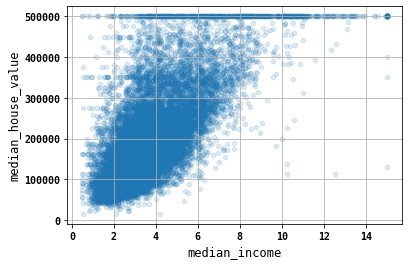

In [159]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.15, grid = True)

As we see, correlation between these two attributes is strong. We see linear upward trend. What's interesting is a horizontal line on y = 500000, 450000 and 350000. Maybe data is imposed, and it should be considered to delete it so the performance of the model isn't badly influenced.

Dealing with nulls

In [ ]:
housing = 

In [87]:
null_rows_idx = housing.isnull().any(axis=1)
housing1[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
22,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,153800.0,<1H OCEAN
91,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN
106,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,263800.0,NEAR OCEAN
323,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,59600.0,INLAND
423,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,125000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15811,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,137500.0,<1H OCEAN
15911,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,58400.0,INLAND
15953,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN
15980,-118.43,34.20,28.0,3386.0,NaN,2240.0,737.0,3.0221,290100.0,<1H OCEAN


In [92]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(strategy = 'median')

housing_numerical = housing1.select_dtypes(include=[np.number])

imp_median.fit(housing_numerical)

SimpleImputer(strategy='median')

In [93]:
imp_median.statistics_ #median calculated for all the attributes 
#housing_numerical.median().values # the same values 

array([-1.1849e+02,  3.4250e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1690e+03,  4.1100e+02,  3.5246e+00,  1.7920e+05])

In [94]:
X = imp_median.transform(housing_numerical)

In [95]:
imp_median.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [96]:
housing_transformed = pd.DataFrame(X, columns = housing_numerical.columns, index = housing_numerical.index)

In [97]:
housing_transformed[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
22,-118.31,33.94,40.0,1550.0,437.0,798.0,270.0,3.7750,153800.0
91,-117.86,34.01,16.0,4632.0,437.0,3038.0,727.0,5.1762,264400.0
106,-119.75,34.45,6.0,2864.0,437.0,1404.0,603.0,5.5073,263800.0
323,-120.32,37.29,38.0,576.0,437.0,478.0,112.0,2.3382,59600.0
423,-121.85,36.61,38.0,238.0,437.0,191.0,67.0,1.3897,125000.0
...,...,...,...,...,...,...,...,...,...
15811,-118.16,34.01,40.0,1552.0,437.0,1919.0,427.0,2.2596,137500.0
15911,-120.98,37.60,36.0,1437.0,437.0,1073.0,320.0,2.1779,58400.0
15953,-118.08,33.92,38.0,1335.0,437.0,1011.0,269.0,3.6908,157500.0
15980,-118.43,34.20,28.0,3386.0,437.0,2240.0,737.0,3.0221,290100.0


Removing outliers

In [99]:
housing_numerical.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [100]:
import seaborn as sns

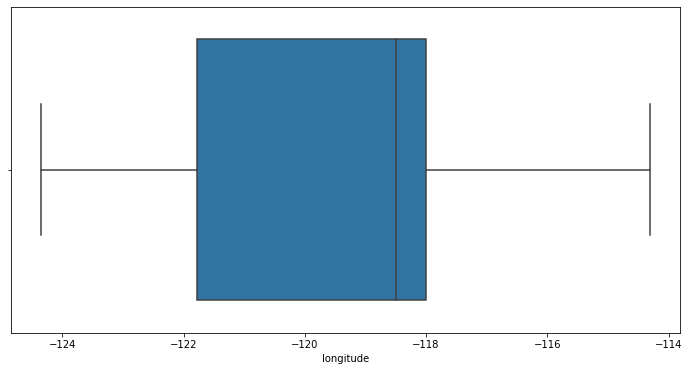

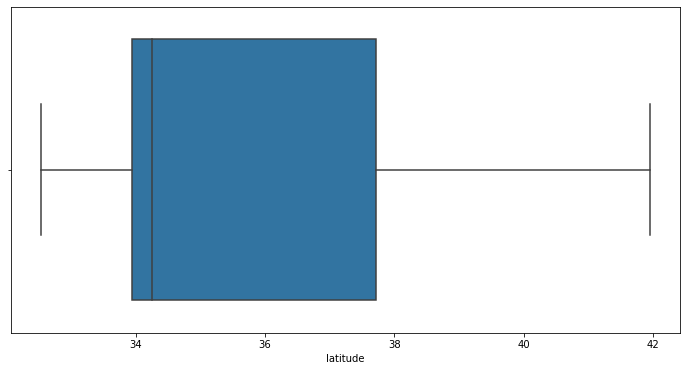

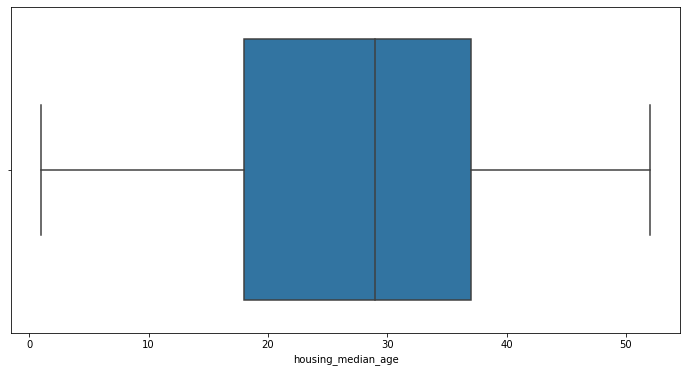

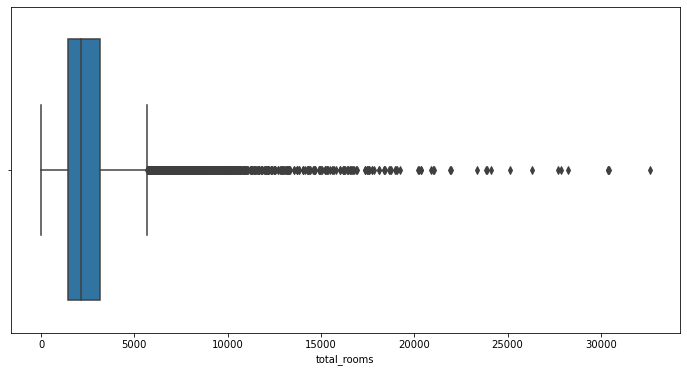

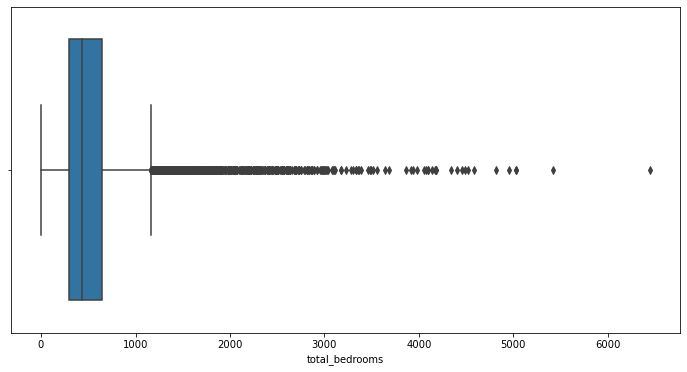

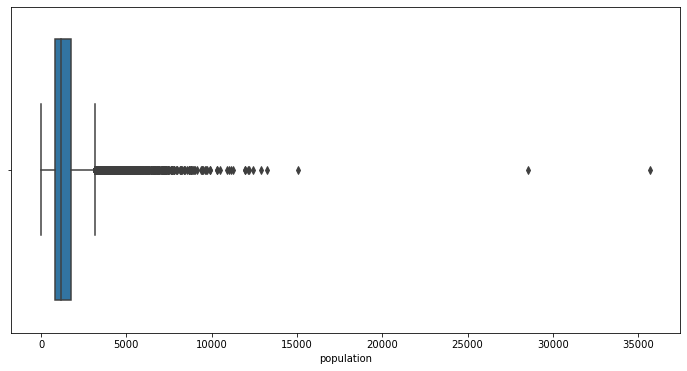

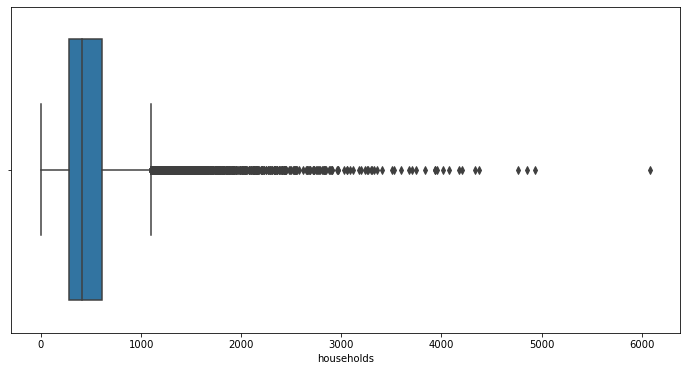

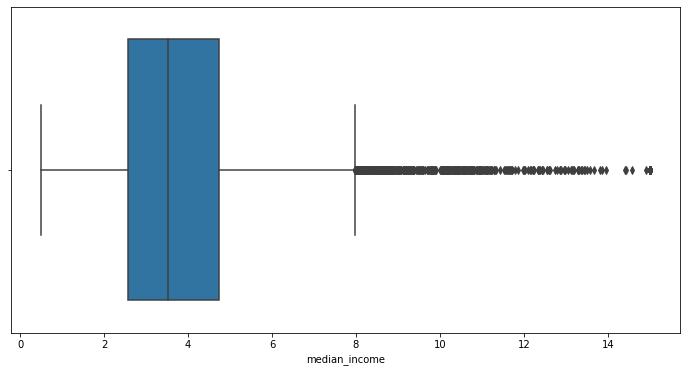

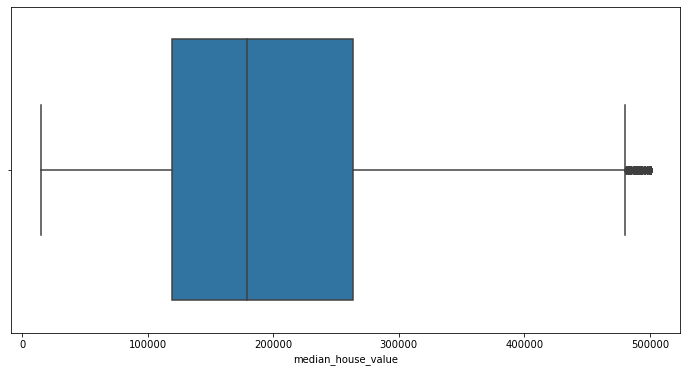

In [116]:
for i in housing_numerical.columns:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=housing_transformed,ax=ax)

We will remove outliers from data:

In [112]:
#from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [113]:
# class RemoveOutliers(BaseEstimator,TransformerMixin):
#     def fit (self,X,y=None):
#         return self
    
#     def transform(self,X,y=None):
#         X=X[(X['median_house_value']!=500000)].reset_index(drop=True)
#         X=X[X['median_income']<=11].reset_index(drop=True)
#         X=X[(X['median_house_value']!=350000) ].reset_index(drop=True)
#         X=X[(X['median_house_value']!=450000) ].reset_index(drop=True)
#         X=X[X['population']<=9000]
#         return X

In [114]:
# housing1 = RemoveOutliers().fit_transform(housing1)

In [115]:
# housing1.hist(figsize=(20,20))

In [130]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [131]:
outlier_pred

array([-1,  1, -1, ...,  1,  1,  1])

In [132]:
housing_labels = housing_transformed["median_house_value"].copy()

In [134]:
housing = housing_transformed.iloc[outlier_pred == 1]
housing_labels = housing_labels.iloc[outlier_pred == 1]

In [135]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0
3,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0
6,-123.38,41.80,25.0,1941.0,477.0,1000.0,390.0,2.2976,54400.0
7,-118.41,34.29,32.0,1591.0,320.0,1818.0,306.0,4.2969,145800.0
8,-119.95,38.94,24.0,2180.0,517.0,755.0,223.0,2.5875,173400.0
...,...,...,...,...,...,...,...,...,...
16507,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0
16508,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0
16509,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0
16510,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0
